# <center>Laboratorium 11<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z metodami całkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, należy wyznaczyć wartość całki tej funkcji na przedziale $a$,$b$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate 
import scipy as sp

***Zadanie 1.***    
Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\log(1+\tan(x))dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=\cfrac{\pi}{4}$ przy pomocy następujących metod:  
    1. Metoda Trapezów - [trapz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html#scipy.integrate.trapz)
    2. Metoda Simpsona - [simps](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps) 
    3. Metoda Romberga - [romb](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romb.html#scipy.integrate.romb)  
  
Sprawdź jak wyniki róźnią się od siebie, czy ma na nie wpływ długość wektora $\mathbf{y}$ oraz wartość parametru $dx$

3. Porównaj wyniki i czas obliczeń z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy-integrate-quad)
    2. [romberg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html#scipy.integrate.romberg)
    3. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

<ipython-input-2-6319ea693027>:1: RuntimeWarning: invalid value encountered in log
  f = lambda x: np.log(1+np.tan(x))


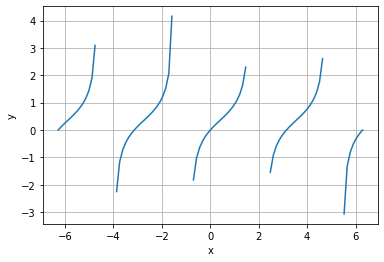

In [2]:
f = lambda x: np.log(1+np.tan(x))
x = np.linspace(-2*np.pi,2*np.pi,100)
plt.plot(x,f(x))
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

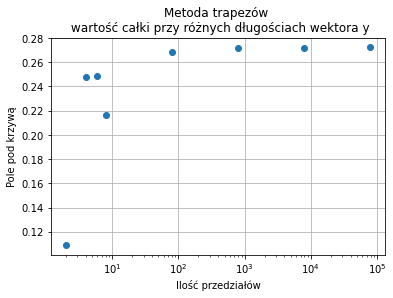

In [3]:
#metoda trapezow
dx=[0.5,0.25,0.15,0.1,0.01,0.001,0.0001,0.00001]
f=lambda x:np.log(1+np.tan(x))
rozw=[]
len_y=[]
for i in dx:
    x=np.arange(0,np.pi/4,i)
    inte = sp.integrate.trapz(f(x),x)
    rozw.append(inte)
    len_y.append(len(f(x)))
plt.scatter(len_y,rozw)
plt.xscale('log')
plt.title("Metoda trapezów \n wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Ilość przedziałów")
plt.grid(True)
plt.show()

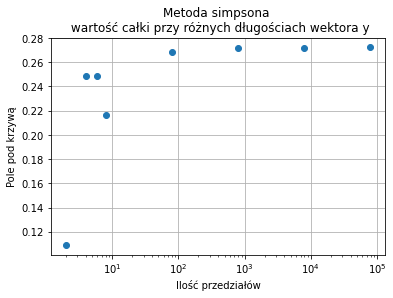

In [4]:
#metoda Simpsona
dx=[0.5,0.25,0.15,0.1,0.01,0.001,0.0001,0.00001]
f=lambda x:np.log(1+np.tan(x))
rozw=[]
len_y=[]
for i in dx:
    x=np.arange(0,np.pi/4,i)
    inte = sp.integrate.simps(f(x),x)
    rozw.append(inte)
    len_y.append(len(f(x)))
plt.scatter(len_y,rozw)
plt.xscale('log')
plt.title("Metoda simpsona \n wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Ilość przedziałów")
plt.grid(True)
plt.show()

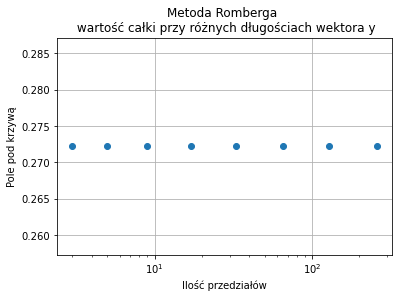

In [5]:
#metoda Romberga
dx=range(1,9)
f=lambda x:np.log(1+np.tan(x))
rozw=[]
len_y=[]
for i in dx:
    x=np.linspace(0,np.pi/4,num=2**i+1)
    g=((np.pi/4)/(2**i))
    inte = sp.integrate.romb(f(x),g)
    rozw.append(inte)
    len_y.append(len(f(x)))
plt.scatter(len_y,rozw)
plt.xscale('log')
plt.title("Metoda Romberga \n wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Ilość przedziałów")
plt.grid(True)
plt.show()

In [6]:
f = lambda x:np.log(1+np.tan(x))
quadrature,q_err=scipy.integrate.quadrature(f,0,np.pi/4)
print(quadrature,q_err)

0.27219826128795027 5.551115123125783e-17


In [7]:
f = lambda x:np.log(1+np.tan(x))
romberg = scipy.integrate.romberg(f,0,np.pi/4)
print(romberg)

0.27219826128795016


In [8]:
f = lambda x:np.log(1+np.tan(x))
quad,quad_err=scipy.integrate.quad(f,0,np.pi/4)
print(quad,quad_err)

0.27219826128795027 3.022007769448168e-15


Różnica z quad bo daje najmniejszy błąd:

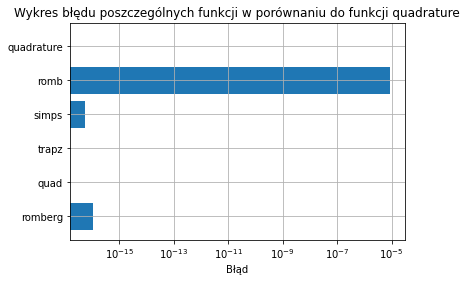

In [9]:
x = np.linspace(0,np.pi/4,2**15+1)
trapz=sp.integrate.trapz(f(x),x)
simps=sp.integrate.simps(f(x),x)
romb = sp.integrate.romb(f(x),dx=np.pi/4/(2**15+1))
quadrature,q_err = scipy.integrate.quad(f,0,np.pi/4)
romberg = scipy.integrate.romberg(f,0,np.pi/4)

labels=['romberg','quad','trapz','simps','romb','quadrature']
rozn = np.abs(quadrature-np.array([romberg,quad,trapz,simps,romb,quadrature]))
x1 = np.arange(6)
plt.barh(x1,rozn)
plt.yticks(x1,labels)
plt.xscale('log')
plt.title("Wykres błędu poszczególnych funkcji w porównaniu do funkcji quadrature")
plt.xlabel('Błąd')
plt.grid(True)
plt.show()

Czasy wykonania

In [10]:
%%timeit -r 100 -n 100
#trapz
x=np.linspace(0,np.pi/4,2**10+1)
trapz=sp.integrate.trapz(f(x),x)

142 µs ± 30.1 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


In [11]:
%%timeit -r 100 -n 100
#simps
x=np.linspace(0,np.pi/4,2**10+1)
simps=sp.integrate.simps(f(x),x)

194 µs ± 21.9 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


In [12]:
%%timeit -r 100 -n 100
#romb
x=np.linspace(0,np.pi/4,2**10+1)
romb=sp.integrate.romb(f(x),dx=np.pi/4/(2**10+1))

324 µs ± 52.8 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


In [13]:
%%timeit -r 100 -n 100
#quadrature
quadrature,q_err=scipy.integrate.quadrature(f,0,np.pi/4)

77.1 µs ± 13.7 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


In [14]:
%%timeit -r 100 -n 100
#romberg
romberg=scipy.integrate.romberg(f,0,np.pi/4)

66.3 µs ± 14.5 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


In [15]:
%%timeit -r 100 -n 100
#quad
quad,quad_err=scipy.integrate.quad(f,0,np.pi/4)

106 µs ± 11.7 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


***Zadanie 2.***  
Dla funkcji 

$$f(x) = e^{x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 1.

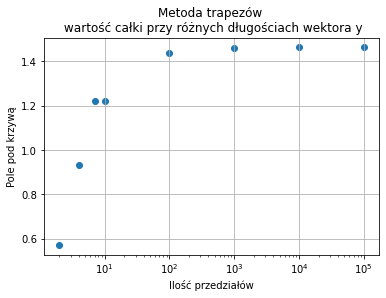

In [18]:
#metoda trapezow
dx=[0.5,0.25,0.15,0.1,0.01,0.001,0.0001,0.00001]
f=lambda x:np.exp(x**2)
rozw=[]
len_y=[]
for i in dx:
    x=np.arange(0,1,i)
    inte = sp.integrate.trapz(f(x),x)
    rozw.append(inte)
    len_y.append(len(f(x)))
plt.scatter(len_y,rozw)
plt.xscale('log')
plt.title("Metoda trapezów \n wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Ilość przedziałów")
plt.grid(True)
plt.show()

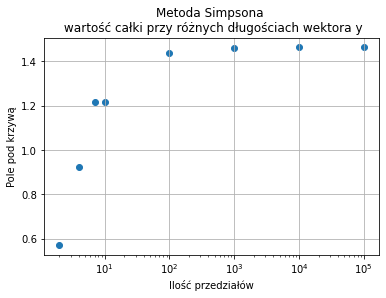

In [22]:
#metoda trapezow
dx=[0.5,0.25,0.15,0.1,0.01,0.001,0.0001,0.00001]
f=lambda x:np.exp(x**2)
rozw=[]
len_y=[]
for i in dx:
    x=np.arange(0,1,i)
    inte = sp.integrate.simps(f(x),x)
    rozw.append(inte)
    len_y.append(len(f(x)))
plt.scatter(len_y,rozw)
plt.xscale('log')
plt.title("Metoda Simpsona \n wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Ilość przedziałów")
plt.grid(True)
plt.show()

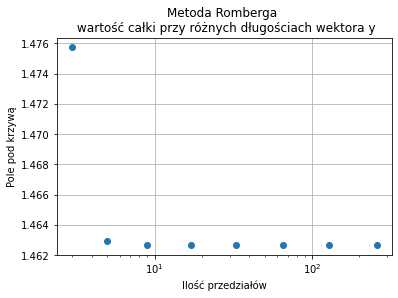

In [21]:
#metoda Romberga
dx=range(1,9)
f=lambda x:np.exp(x**2)
rozw=[]
len_y=[]
for i in dx:
    x=np.linspace(0,1,num=2**i+1)
    g=((1-0)/(2**i))
    inte = sp.integrate.romb(f(x),g)
    rozw.append(inte)
    len_y.append(len(f(x)))
plt.scatter(len_y,rozw)
plt.xscale('log')
plt.title("Metoda Romberga \n wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Ilość przedziałów")
plt.grid(True)
plt.show()

In [23]:
f = lambda x:np.exp(x**2)
quadrature,q_err=scipy.integrate.quadrature(f,0,1)
print(quadrature,q_err)

1.4626517458962958 9.92098181384904e-10


In [24]:
f = lambda x:np.exp(x**2)
romberg=scipy.integrate.romberg(f,0,1)
print(romberg)

1.4626517459101032


In [26]:
f = lambda x:np.exp(x**2)
quad,quad_err=scipy.integrate.quad(f,0,1)
print(quad,quad_err)

1.4626517459071815 1.623869645314337e-14


Wnioski:  
Możliwe jest wykonanie całki na zadanym przediale 𝑎𝑏∈(0,𝜋/4 ) ponieważ funkcja jest na tym przedziale ograniczona, ciągła i różniczkowalna.Wartość dx oznacza odstęp pomiędzy punktami wektora y. Jeżeli wartość będzie za duża dostaniemy zły wynik całki. Geometrycznie oznacza to, że wykres został ściśnięty lub rozciągnięty na osi x. Wszystkie funkcje zwróciły poprawną wartość przy dobrych przedziałach.•Na tych laboratoriach poznałem metody obliczania całek oznaczonych. Błędy obliczeń zależą od kilku czynników: od długości przedziału, od metody przyjętej do obliczeń a także samej funkcji. Metody numeryczne dają nam okazję policzyć całki z funkcji których analitycznie nie ma możliwośći rozwiązać. Niestety musimy sie liczyć z błędami obliczeń, jednak na ten moment zadana dokładność jest w pełni akceptowalna i pozwala bardzo dobrze przybliżyć rozwiązanie danego problemu.